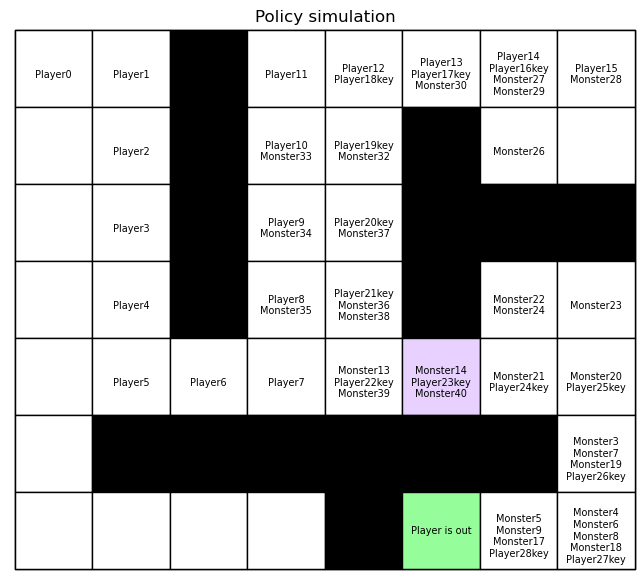

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz

maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
mz.draw_maze(maze_mat, start_pos, minotaur_pos)

# Create an environment maze
env = mz.Maze_bonus(maze_mat,None,False,False)
# Finite horizon
horizon = 40
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)
method = 'DynProg'
start  = ((0, 0),(6, 5),0)
path = env.simulate(start, policy, method)
mz.animate_solution(maze_mat, path)
#print(path)

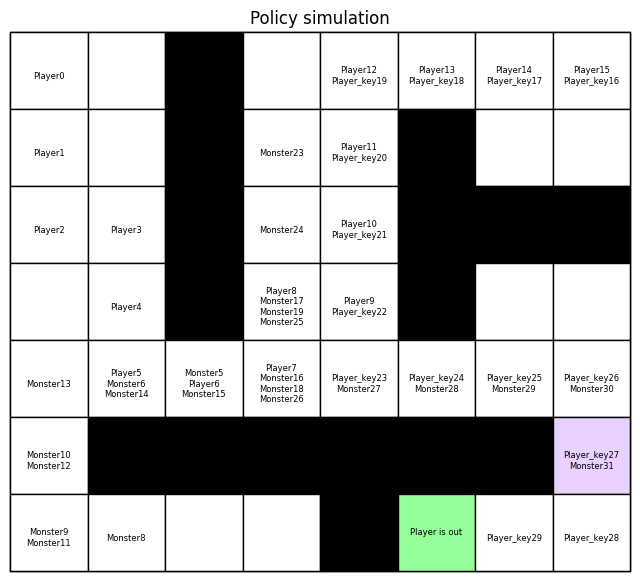

In [1]:
#SARSA
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
mz_b.draw_maze(maze_mat, start_pos, minotaur_pos,key_pos)
# SARSA
env = mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 100000
t_horizon = 300
alpha = 2/3
gamma = 49/50
epsilon_list = [0.1,0.2]
start  = ((0, 0),(6, 5),0)
value_mat = [[],[]]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
Q, policy, value_list_1 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[0])
value_mat[0] = value_list_1
Q, policy1, value_list_2 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[1])
value_mat[1] = value_list_2
print("Simulation done")
method = 'ValIter'
path = env.simulate(start, policy1, method)
# Show the shortest path 
print(path)
mz_b.animate_solution(maze_mat, path)

Training: 100%|██████████| 100000/100000 [01:00<00:00, 1664.81episode/s]


Simulation done


Training: 100%|██████████| 100000/100000 [00:44<00:00, 2268.54episode/s]


Simulation done


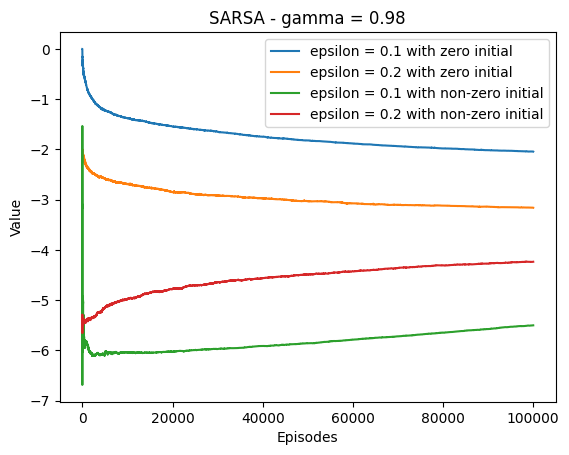

In [5]:
#random Q_init
Q_init = -np.random.uniform(1, 20, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_init[s,:]=np.zeros(n_actions)
for epsilon in epsilon_list:
    value_list = []
    Q, policy, value_list = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon)
    value_mat.append(value_list)
    print("Simulation done")
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('Value')
plt.xlabel('Episodes')
plt.title('SARSA - gamma = '+str(gamma))
plt.legend(['epsilon = 0.1 with zero initial', 'epsilon = 0.2 with zero initial',
            'epsilon = 0.1 with non-zero initial', 'epsilon = 0.2 with non-zero initial'])
plt.show()